In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Direct simulation of propagation

In [2]:
d = 300
K = 100

Wlist = [np.random.randn(d,d) for k in range(K)]
hList = [np.random.randn(d,1) for k in range(K)]

actL = ['relu', 'leaky_relu', 'tanh']
colors = dict([(actL[n], ['b','r','g'][n]) for n in range(3)])

def sigma(x, activation):
    if activation == 'relu':
        return np.clip(x, 0,np.inf)
    elif activation == 'leaky_relu':
        return x.clip(0,np.inf)+0.5*x.clip(-np.inf,0)
    elif activation == 'tanh':
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    

def propagate(z0, activation, alpha_w, alpha_h):    
    zList = [z0]
    xList = [sigma(z0, activation)]
    for k in range(K):  
        np.dot(Wlist[k], xList[-1])
        x_old = xList[-1]
        z = np.dot(alpha_w/np.sqrt(d)*Wlist[k], x_old)+alpha_h*hList[k]
        x = sigma(z, activation)
        zList.append(z)
        xList.append(x)
    return xList, zList

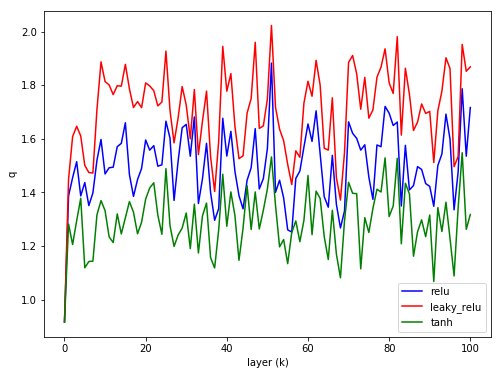

In [3]:
alpha_w = 0.8
alpha_h = 1.

plt.figure(figsize=(8,6))
z0 = np.random.randn(d,1)
for activation in actL:
    xList, zList = propagate(z0, activation, alpha_w, alpha_h)
    qList = [np.sum(z*z)/d for z in zList]
    plt.plot(qList, colors[activation], label=activation)

plt.xlabel('layer (k)')
plt.ylabel('q')
plt.legend()
plt.show()

### Transfer function $\nu$ and its fixed points

In [4]:
def nu(q, activation, alpha_w, alpha_h):
    N = 10000
    s = np.random.randn(N)
    integral = np.mean(sigma(np.dot(np.sqrt(q).reshape(-1,1), s.reshape(1,-1)), activation)**2, axis=1)
    q_new = alpha_w**2*integral+alpha_h**2
    return q_new 

==== relu
Stable fixed point: 1.4726554445469378
==== leaky_relu
Stable fixed point: 1.6684079033493582
==== tanh
Stable fixed point: 1.2792700958733132


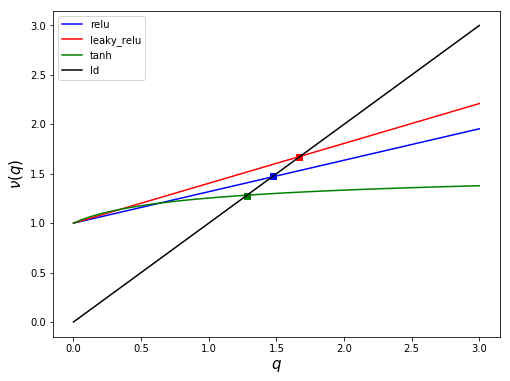

In [7]:
q = np.linspace(0,3)
q_fixedD = {}

plt.figure(figsize=(8,6))
for activation in actL:
    print ('====', activation)
    q_new = nu(q, activation, alpha_w, alpha_h)
    plt.plot(q, q_new, colors[activation], label=activation, )
    q_fixed = 1
    for k in range(100):
        q_fixed = nu(q_fixed, activation, alpha_w, alpha_h)
    q_fixedD[activation] = q_fixed[0]
    print ('Stable fixed point:', q_fixedD[activation])
    plt.plot([q_fixed], [q_fixed], colors[activation]+'s')

plt.plot(q, q, 'k', label='Id')
plt.xlabel('$q$', fontsize=15)
plt.ylabel('$\\nu(q)$', fontsize=15)
plt.legend()
plt.show()

#### Repeat direct simulation with added ficed point lines:

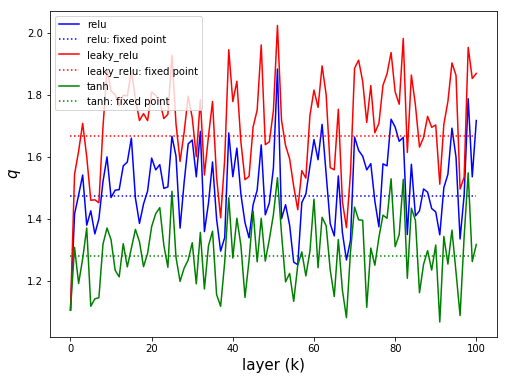

In [8]:
plt.figure(figsize=(8,6))
z0 = np.random.randn(d,1)
for activation in actL:
    xList, zList = propagate(z0, activation, alpha_w, alpha_h)
    qList = [np.sum(z*z)/d for z in zList]
    plt.plot(qList, colors[activation], label=activation)
    plt.plot(q_fixedD[activation]*np.ones(len(qList)), colors[activation]+':', label=activation+': fixed point')

plt.xlabel('layer (k)', fontsize=15)
plt.ylabel('$q$', fontsize=15)
plt.legend()
plt.show()

### Propagation of correlations

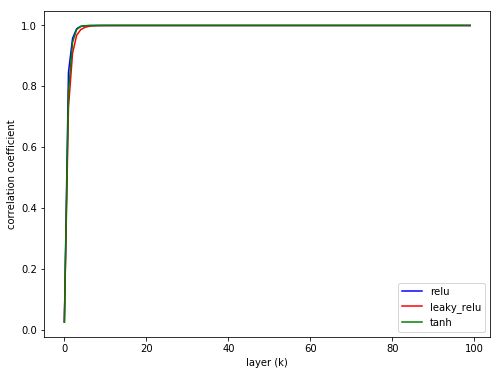

In [9]:
plt.figure(figsize=(8,6))
z01 = np.random.randn(d,1)
z02 = np.random.randn(d,1)
for activation in actL:
    xList1, zList1 = propagate(z01, activation, alpha_w, alpha_h)
    xList2, zList2 = propagate(z02, activation, alpha_w, alpha_h)
    qList = [np.sum(z*z) for z in zList]
    cList = [np.sum(zList1[n]*zList2[n])/np.sqrt(np.sum(zList1[n]**2)*np.sum(zList2[n]**2)) for n in range(K)]
    plt.plot(cList, colors[activation], label=activation)

plt.xlabel('layer (k)')
plt.ylabel('correlation coefficient')
plt.legend()
plt.show()

### Computing $\chi_1$

In [10]:
def chi1(alpha_w, q_fixed):
    N = 10000
    s = np.random.randn(N)
    u = np.dot(np.sqrt(q_fixed).reshape(-1,1), s.reshape(1,-1))
    eps = 1e-10
    sigma_deriv = (sigma(u+eps, activation)-sigma(u-eps, activation))/(2*eps)
    integral = np.mean(sigma_deriv**2)
    return alpha_w**2*integral  

In [12]:
for activation in actL:
    print ('===='), activation
    print ('Chi1:', chi1(alpha_w, q_fixedD[activation]))


====
Chi1: 0.32428804755492185
====
Chi1: 0.397216059158504
====
Chi1: 0.268585569302772


### "Chaotic" phase (by changing $\alpha_w,\alpha_h$)

==== relu
Stable fixed point: 0.04572895895373962
==== leaky_relu
Stable fixed point: 0.2850429138278473
==== tanh
Stable fixed point: 0.34467657161713083


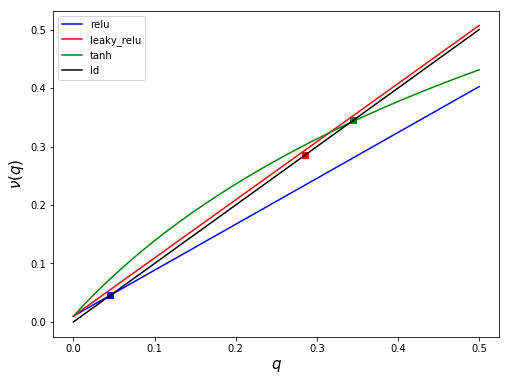

In [13]:
alpha_w = 1.24
alpha_h = 0.1

q = np.linspace(0,0.5)
q_fixedD = {}

plt.figure(figsize=(8,6))
for activation in actL:
    print ('====', activation)
    q_new = nu(q, activation, alpha_w, alpha_h)
    plt.plot(q, q_new, colors[activation], label=activation, )
    q_fixed = 1
    for k in range(1000):
        q_fixed = nu(q_fixed, activation, alpha_w, alpha_h)
    q_fixedD[activation] = q_fixed[0]
    print ('Stable fixed point:', q_fixedD[activation])
    plt.plot([q_fixed], [q_fixed], colors[activation]+'s')

plt.plot(q, q, 'k', label='Id')
plt.xlabel('$q$', fontsize=15)
plt.ylabel('$\\nu(q)$', fontsize=15)
plt.legend()
plt.show()

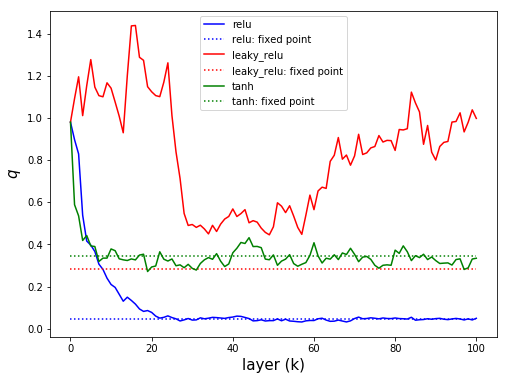

In [14]:
plt.figure(figsize=(8,6))
z0 = np.random.randn(d,1)
for activation in actL:
    xList, zList = propagate(z0, activation, alpha_w, alpha_h)
    qList = [np.sum(z*z)/d for z in zList]
    plt.plot(qList, colors[activation], label=activation)
    plt.plot(q_fixedD[activation]*np.ones(len(qList)), colors[activation]+':', label=activation+': fixed point')

plt.xlabel('layer (k)', fontsize=15)
plt.ylabel('$q$', fontsize=15)
plt.legend()
plt.show()

In [16]:
for activation in actL:
    print ('====', activation)
    print ('Chi1:', chi1(alpha_w, q_fixedD[activation]))

==== relu
Chi1: 0.7786406984654326
==== leaky_relu
Chi1: 0.9590396808054734
==== tanh
Chi1: 1.0139877340831165


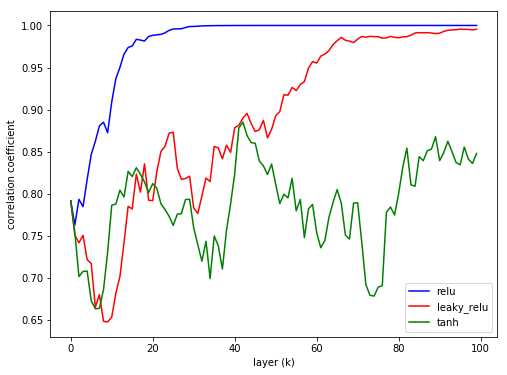

In [17]:
plt.figure(figsize=(8,6))
z01 = np.random.randn(d,1)
z02 = z01+0.7*np.random.randn(d,1)
for activation in actL:
    xList1, zList1 = propagate(z01, activation, alpha_w, alpha_h)
    xList2, zList2 = propagate(z02, activation, alpha_w, alpha_h)
    qList = [np.sum(z*z) for z in zList]
    cList = [np.sum(zList1[n]*zList2[n])/np.sqrt(np.sum(zList1[n]**2)*np.sum(zList2[n]**2)) for n in range(K)]
    plt.plot(cList, colors[activation], label=activation)

plt.xlabel('layer (k)')
plt.ylabel('correlation coefficient')
plt.legend()
plt.show()